In [1]:
import random
from collections import defaultdict
from statistics import mean

import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

SEED = 1031
random.seed(SEED)
np.random.seed(SEED)
figsize=(16, 16)
plt.rc('font', size=32)
alpha=0.4

In [2]:
data = pd.read_csv('standard.csv')
data = data.set_index('SRCID')
data

Mode  A1  A2  undecided_voter  A3  A4a  A4b  A4c  A4d  A4e  ...  F2a  \
SRCID                                                              ...        
2         1   1   0            False   8    1    1    1    1    1  ...    1   
3         1   1  13            False   7    1    2    1    0    1  ...    4   
4         1   1   0            False   7    1    1    1    0    1  ...    1   
6         1   1   2            False   6    2    2    1    1    1  ...    5   
7         1   1   0            False   5    1    2    1    1    0  ...    0   
...     ...  ..  ..              ...  ..  ...  ...  ...  ...  ...  ...  ...   
3581      0   1   0            False   4    0    1    0    0    0  ...    1   
3583      0   1   2            False   9    0    1    0    0    0  ...    1   
3585      0   0  24             True  10    0    2    0    0    0  ...    1   
3587      0   1   0            False   9    1    1    0    1    0  ...    1   
3588      0   3   2            False   6    2    2    2    1    1  ...    1   

       F2b  F2c  p_gender_sdc  p_age_group_sdc  p_education_sdc  p_state_sdc  \
SRCID                                                                          
2        2    1             2                4                3            1   
3        3    3             2                4                1            4   
4        1    1             2                4                3            5   
6        1    1             2                4                3            4   
7        0    0             2                4                3            1   
...    ...  ...           ...              ...              ...          ...   
3581     0    1             2                2                1            2   
3583     2    1             2                4                3            5   
3585     1    2             1                3                1            3   
3587     1    1             2                3                2            5   
3588     2    2             2                4                1            2   

       StateMap  A4F2_agg  opinionated  
SRCID                                   
2             1 -0.611111        False  
3             4 -0.388889         True  
4             5 -0.527778        False  
6             4  7.750000        False  
7             1 -0.277778         True  
...         ...       ...          ...  
3581          2 -0.277778         True  
3583          5 -0.444444         True  
3585          3 -0.388889         True  
3587          5 -0.416667         True  
3588          2 -0.750000        False  

[3061 rows x 55 columns]

In [3]:
mm = data
for col in data.keys():
    if mm[col].dtype != bool:
        mm[col] = (mm[col] - mm[col].min()) / (mm[col].max() - mm[col].min())
    else:
        mm[col] = mm[col].astype(int)
mm

Mode   A1    A2  undecided_voter        A3  A4a  A4b  A4c  A4d   A4e  \
SRCID                                                                         
2       1.0  0.2  0.00                0  0.727273  0.2  0.2  0.2  0.2  0.25   
3       1.0  0.2  0.52                0  0.636364  0.2  0.4  0.2  0.0  0.25   
4       1.0  0.2  0.00                0  0.636364  0.2  0.2  0.2  0.0  0.25   
6       1.0  0.2  0.08                0  0.545455  0.4  0.4  0.2  0.2  0.25   
7       1.0  0.2  0.00                0  0.454545  0.2  0.4  0.2  0.2  0.00   
...     ...  ...   ...              ...       ...  ...  ...  ...  ...   ...   
3581    0.0  0.2  0.00                0  0.363636  0.0  0.2  0.0  0.0  0.00   
3583    0.0  0.2  0.08                0  0.818182  0.0  0.2  0.0  0.0  0.00   
3585    0.0  0.0  0.96                1  0.909091  0.0  0.4  0.0  0.0  0.00   
3587    0.0  0.2  0.00                0  0.818182  0.2  0.2  0.0  0.2  0.00   
3588    0.0  0.6  0.08                0  0.545455  0.4  0.4  0.4  0.2  0.25   

       ...  F2a       F2b       F2c  p_gender_sdc  p_age_group_sdc  \
SRCID  ...                                                           
2      ...  0.2  0.333333  0.166667           1.0             1.00   
3      ...  0.8  0.500000  0.500000           1.0             1.00   
4      ...  0.2  0.166667  0.166667           1.0             1.00   
6      ...  1.0  0.166667  0.166667           1.0             1.00   
7      ...  0.0  0.000000  0.000000           1.0             1.00   
...    ...  ...       ...       ...           ...              ...   
3581   ...  0.2  0.000000  0.166667           1.0             0.50   
3583   ...  0.2  0.333333  0.166667           1.0             1.00   
3585   ...  0.2  0.166667  0.333333           0.5             0.75   
3587   ...  0.2  0.166667  0.166667           1.0             0.75   
3588   ...  0.2  0.333333  0.333333           1.0             1.00   

       p_education_sdc  p_state_sdc  StateMap  A4F2_agg  opinionated  
SRCID                                                                 
2             1.000000        0.125     0.125  0.007929            0  
3             0.333333        0.500     0.500  0.015857            1  
4             1.000000        0.625     0.625  0.010902            0  
6             1.000000        0.500     0.500  0.306244            0  
7             1.000000        0.125     0.125  0.019822            1  
...                ...          ...       ...       ...          ...  
3581          0.333333        0.250     0.250  0.019822            1  
3583          1.000000        0.625     0.625  0.013875            1  
3585          0.333333        0.375     0.375  0.015857            1  
3587          0.666667        0.625     0.625  0.014866            1  
3588          0.333333        0.250     0.250  0.002973            0  

[3061 rows x 55 columns]

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


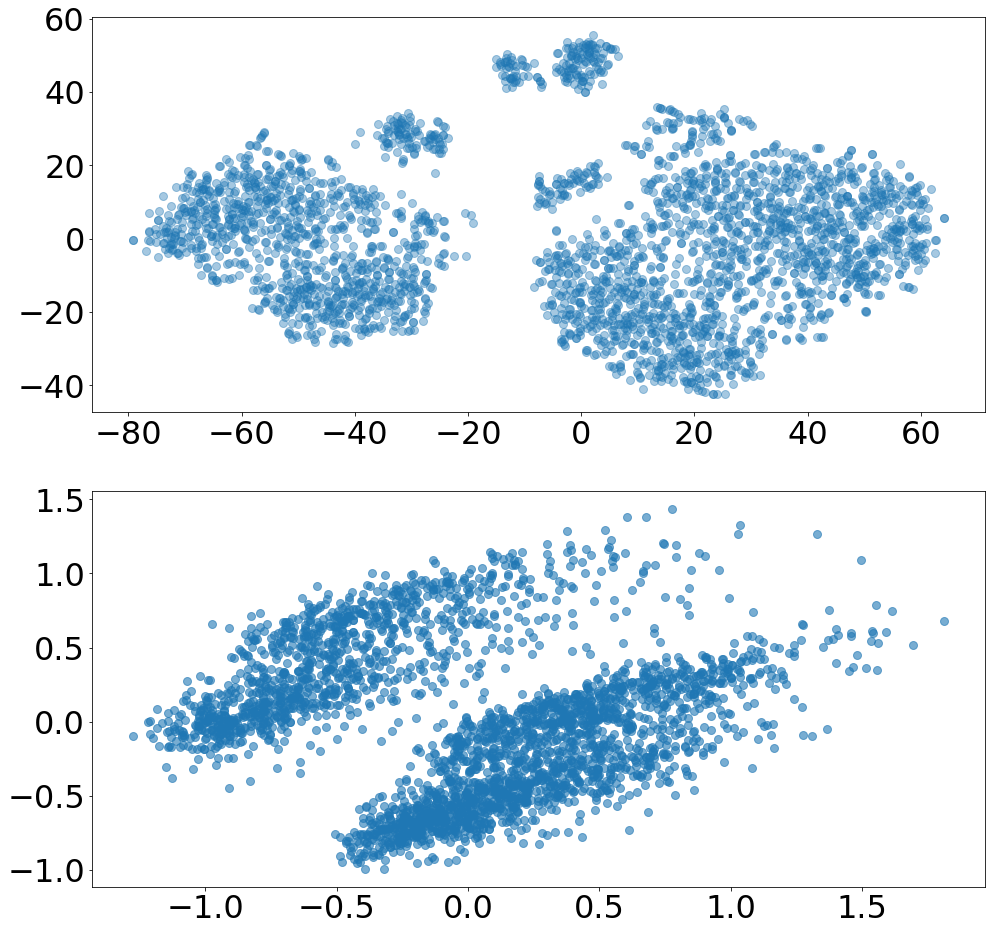

In [4]:
tsne = TSNE(2, random_state=SEED)
ts = tsne.fit_transform(mm)
pca = PCA(2, random_state=SEED).fit(mm)
pc = pca.transform(mm)

fig, (ax0, ax1) = plt.subplots(2, figsize=figsize)
ax0.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], s=64, alpha=alpha)
ax1.scatter(pc[:, 0], pc[:, 1], s=64, alpha=0.6)

In [5]:
def cluster(n_clusters = 2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED).fit(mm)
    distances = kmeans.transform(mm)
    fig, (ax0, ax1) = plt.subplots(2, figsize=figsize)
    centroids = kmeans.cluster_centers_
    cent = pca.transform(centroids)
    ax0.set_title('T-SNE')
    ax1.set_title('PCA')
    for i in range(n_clusters):
        ax0.scatter(tsne.embedding_[i==kmeans.labels_, 0], tsne.embedding_[i==kmeans.labels_, 1], s=64, alpha=alpha)
        ax1.scatter(pc[i==kmeans.labels_, 0], pc[i==kmeans.labels_, 1], s=64, alpha=alpha)
    ax1.scatter(cent[:, 0] ,cent[:, 1], s=128, c='#FF0000')
    cluster_centers = [mm[kmeans.labels_ == i].mean(axis=0) for i in range(n_clusters)]
    sse = [i for i in range(n_clusters)]
    for point, label in zip(mm.values, kmeans.labels_):
        sse[label] += np.square(point - cluster_centers[label]).sum()
    plt.savefig(f'{n_clusters}-means.png', bbox_inches='tight',transparent=True, pad_inches=0)
    return kmeans, fig, sse, kmeans.inertia_

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=2, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [2256.7535396946673, 3459.642496319899],
 5715.396036014565)

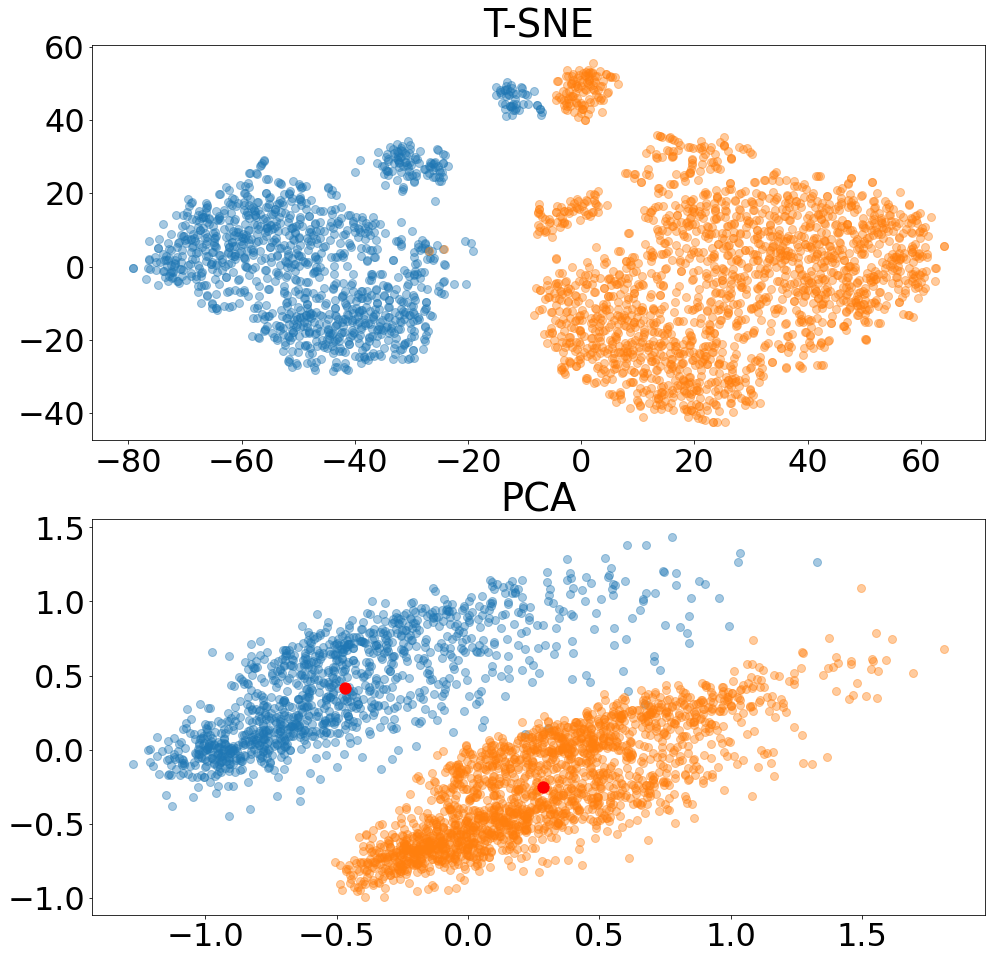

In [6]:
cluster(2)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=3, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [1813.7355011472405, 1963.3805367232592, 1550.4774330952682],
 5324.59347096577)

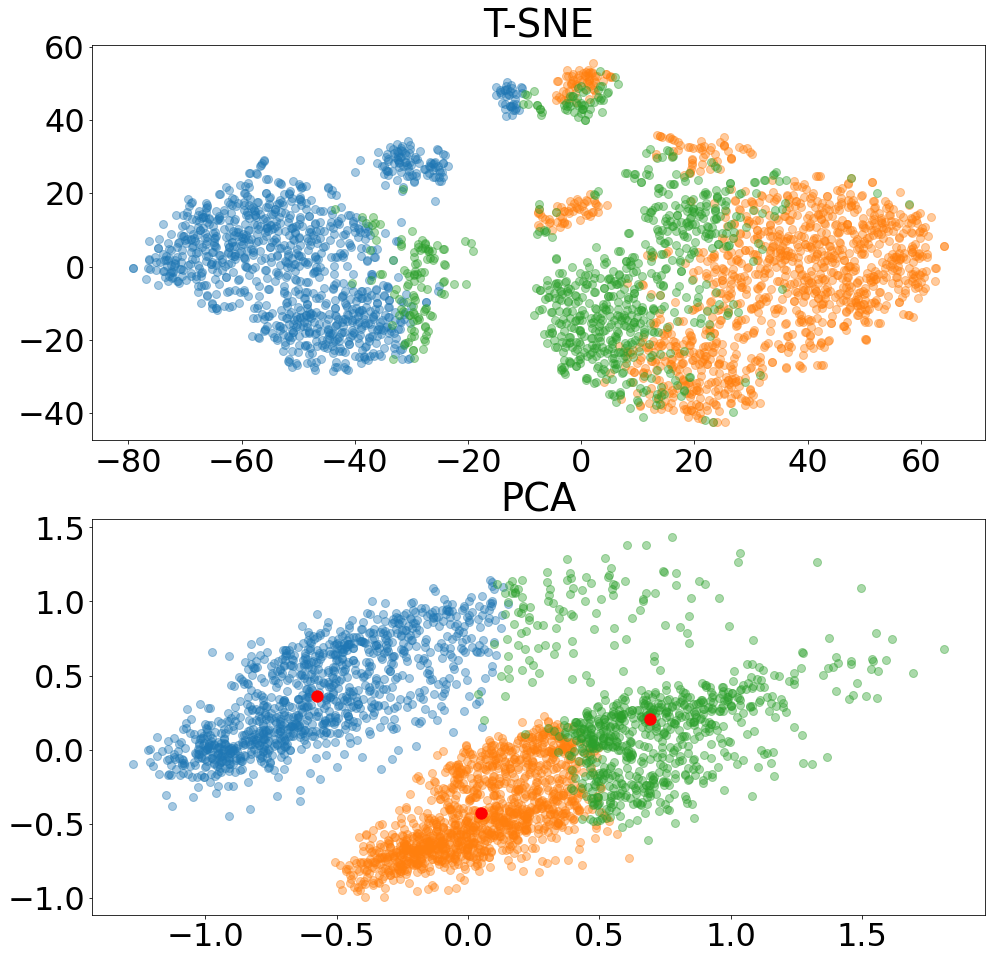

In [7]:
cluster(3)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=4, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [1026.3452284197076, 1341.7652736942455, 1801.47290836093, 913.9837272755259],
 5077.5671377504095)

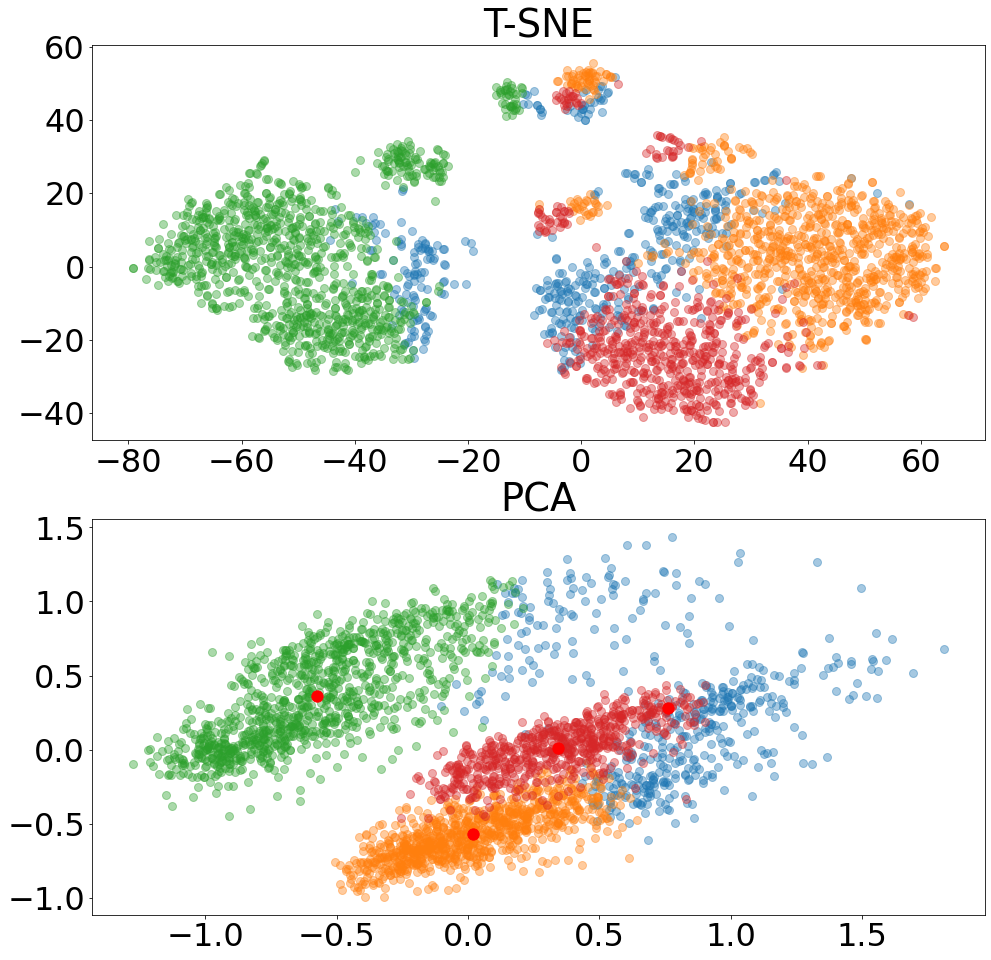

In [8]:
cluster(4)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=5, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [958.3024110387676,
  920.8966986803925,
  1291.2830773531655,
  745.7113356534679,
  977.7472171746011],
 4883.940739900392)

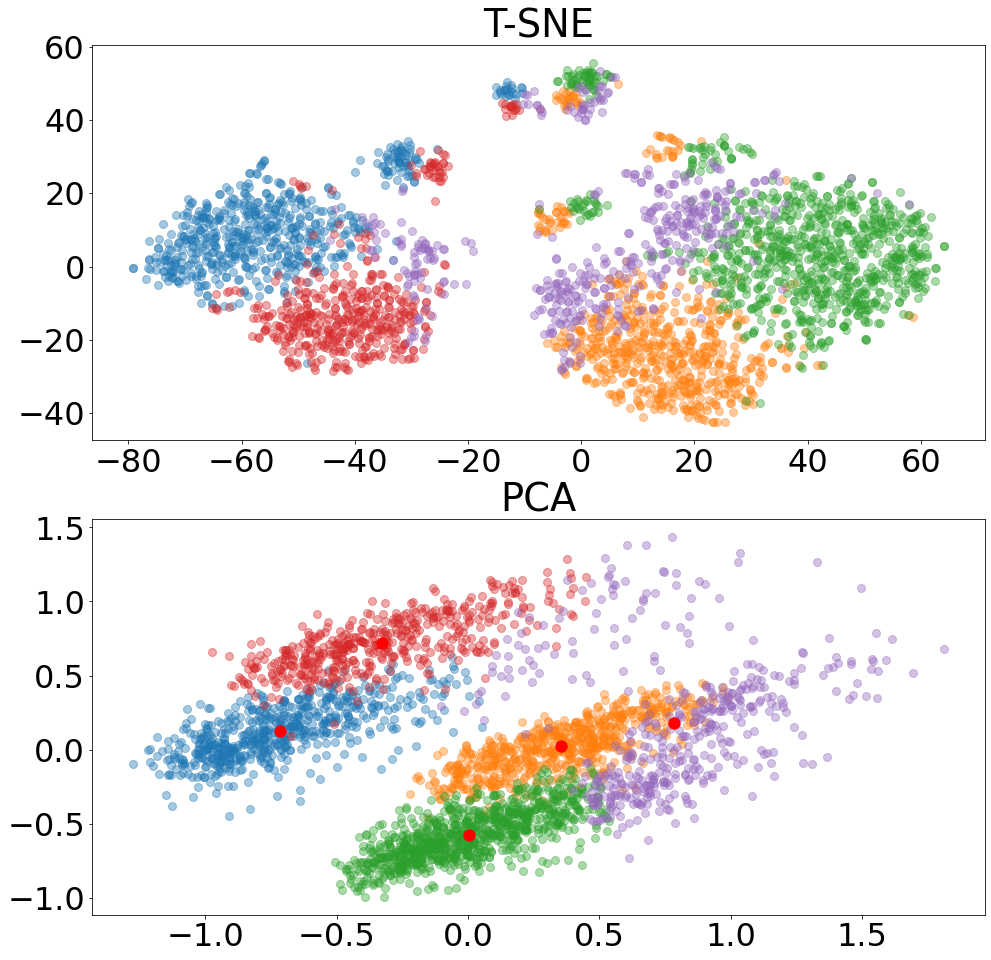

In [9]:
cluster(5)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=6, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [830.091237002305,
  850.0070731298516,
  1127.668888615972,
  691.6426432368344,
  325.34532971758586,
  888.4452221327529],
 4698.200393835301)

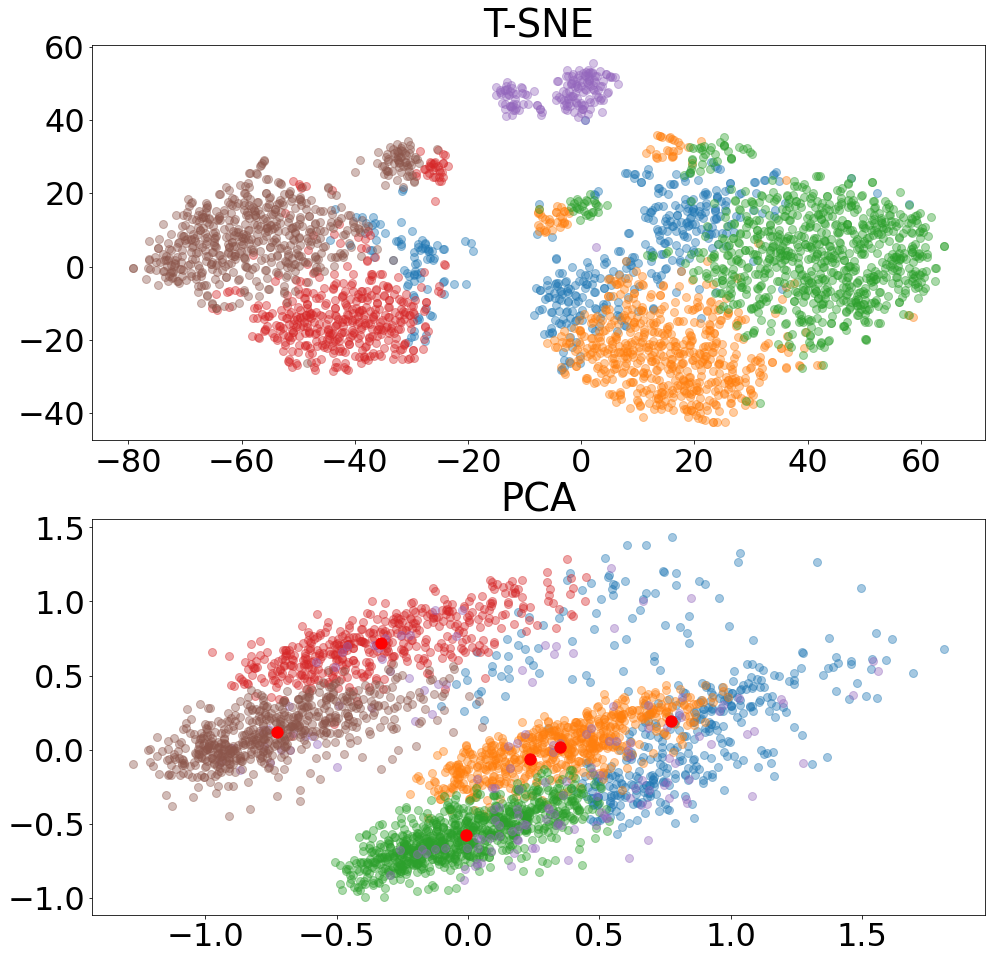

In [10]:
cluster(6)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=7, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [879.3324440580501,
  456.5321344246338,
  669.0476754928193,
  309.55955400757944,
  801.6929129140434,
  758.2986243994022,
  748.6619550837909],
 4602.125300380318)

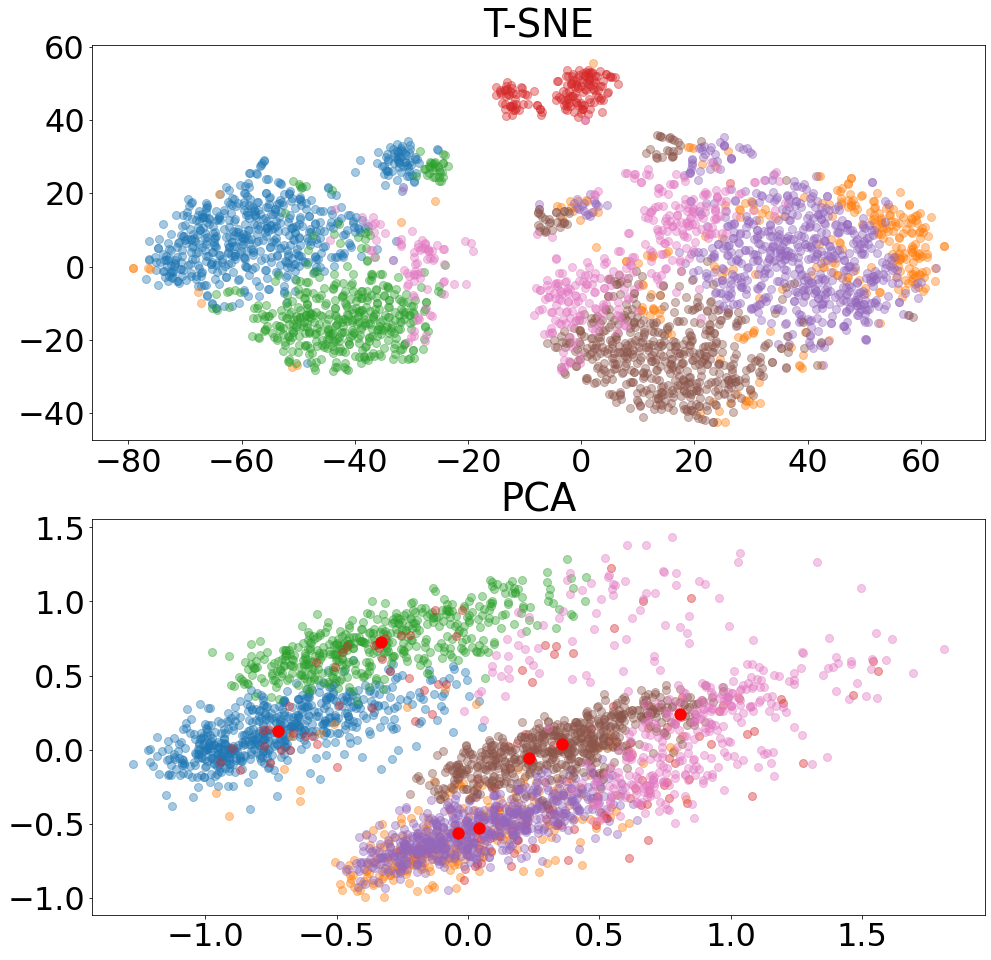

In [11]:
cluster(7)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=28, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [113.87739352685938,
  141.34699433629356,
  126.98965095537126,
  150.53511309565644,
  185.3671971727948,
  167.22095272228944,
  152.09261687324877,
  172.04599877081887,
  88.94022051973758,
  104.03617056677416,
  154.9348563922172,
  235.97046334163136,
  171.07760133520443,
  150.82359020664364,
  153.6737799924684,
  108.70981021790132,
  144.73786478653085,
  135.9918215759823,
  147.84088752725862,
  178.65122681059398,
  139.43750081293788,
  125.1933109860705,
  172.39489774181874,
  126.58695464875139,
  135.6643179789212,
  228.6134383121334,
  142.63439972933068,
  118.96506934482981],
 3796.3541002810707)

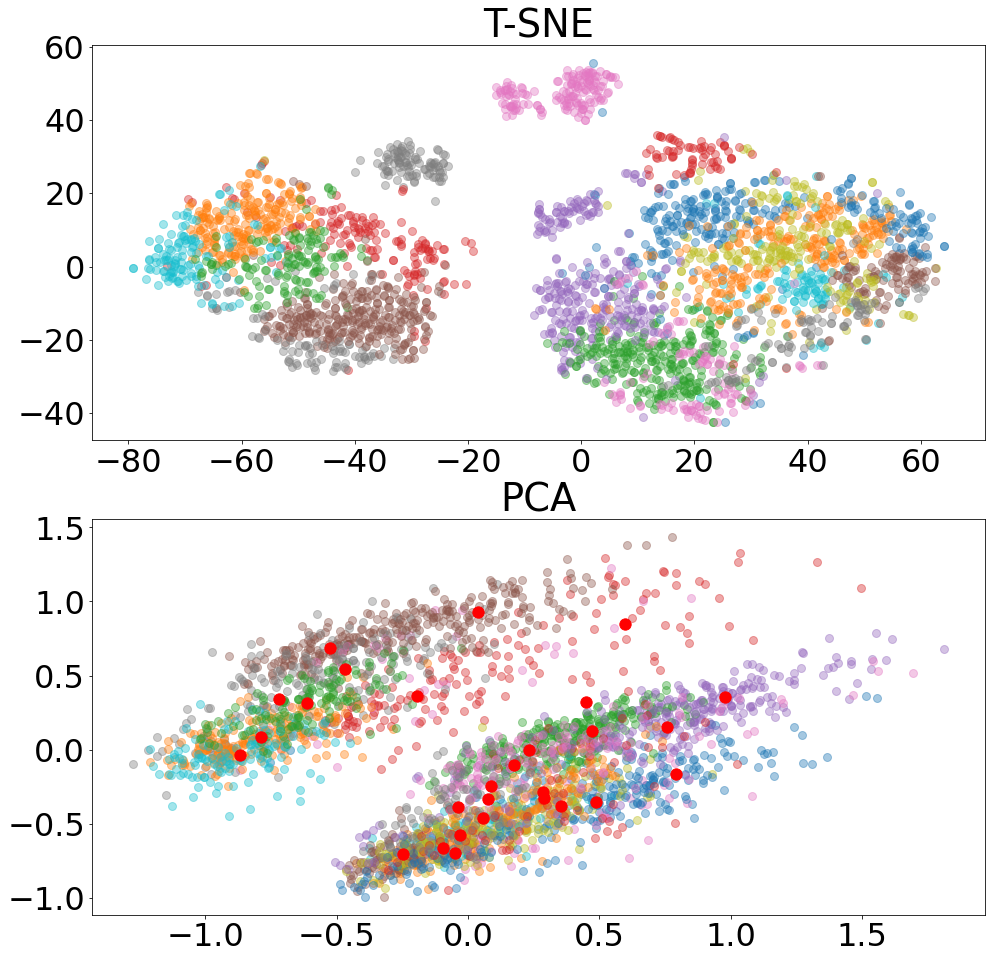

In [12]:
cluster(28)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(KMeans(n_clusters=39, random_state=1031),
 <Figure size 1152x1152 with 2 Axes>,
 [115.74106738171332,
  85.01970136782266,
  74.56415935590948,
  101.93591343557388,
  134.00012689596812,
  115.26993000091129,
  70.2625120024506,
  127.32882445869033,
  156.56449567210834,
  97.18951748239638,
  42.51201474153475,
  92.32476514210592,
  113.35935125888149,
  117.95254365623711,
  158.34022132042136,
  103.39951001290738,
  71.19206426299682,
  103.58058997526363,
  100.36500807487238,
  138.96047523181494,
  131.8493262560243,
  114.696002695145,
  103.18774921870462,
  104.67152190782177,
  116.46159879782698,
  104.33691566219434,
  99.79794120924721,
  135.69617880700332,
  104.56566348189985,
  137.23714487843498,
  98.51347712889519,
  116.93502079847111,
  104.05612771537089,
  167.43679815164464,
  82.60256617532765,
  104.85841564465666,
  154.64136581467645,
  121.60728615865463,
  132.9162561801354],
 3614.9301484127163)

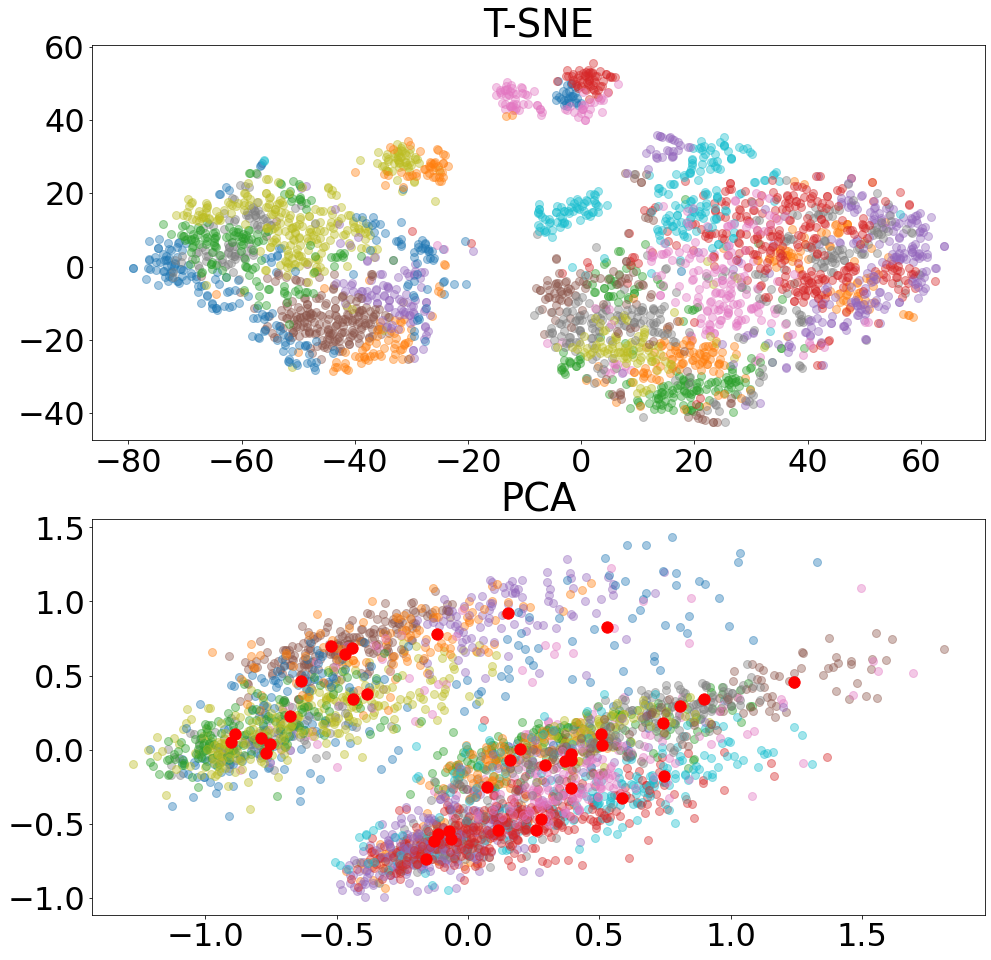

In [13]:
cluster(39)